In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
dg = pd.read_csv('takehome_user_engagement.csv')
dg.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [155]:
dh = pd.read_csv('takehome_users.csv')
dh.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [156]:
dh.rename(columns={'object_id':'user_id'},inplace=True)

In [157]:
#NaN's in the invited_by_user_id column are all for users who singed up on their own and were not invited.
dh[dh.invited_by_user_id.isnull()].creation_source.value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [158]:
#Assign non_invited users 0 meaning no one invited them
dh.loc[dh.invited_by_user_id.isnull(),'invited_by_user_id'] = 0

In [159]:
#No obvious pattern as to where the nulls in last_session_creation_time come from.  Try imputing and dropping
dh[dh.last_session_creation_time.isnull()]

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0
11,12,2014-04-17 23:48:38,Mathiesen L�rke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,0.0
15,16,2013-02-11 10:09:50,Engel Ren�,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,0.0
17,18,2013-08-24 00:26:46,Gregersen Celina,CelinaAGregersen@jourrapide.com,GUEST_INVITE,NaN,0,0,2,3153.0
25,26,2013-07-28 00:53:32,Wexler Florian,FlorianWexler@jourrapide.com,ORG_INVITE,NaN,0,0,56,11857.0
31,32,2013-04-17 16:21:30,Perez Timothy,TimothyJPerez@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,98,0.0
33,34,2014-02-03 20:55:18,Holm Sara,SaraMHolm@hotmail.com,ORG_INVITE,NaN,0,0,33,3721.0
34,35,2013-08-01 10:55:26,Krueger Dieter,DieterKrueger@gustr.com,PERSONAL_PROJECTS,NaN,0,0,59,0.0


In [160]:
#1/4 of data so cant just throw out these rows
len(dh[dh.last_session_creation_time.isnull()])

3177

In [161]:
len(dh)

12000

In [162]:
from sklearn.preprocessing import Imputer
imp = Imputer()
dh.loc[:,'last_session_creation_time'] = imp.fit_transform(dh.last_session_creation_time.values.reshape(-1,1))

In [163]:
df= pd.merge(dh,dg,on='user_id',how='inner')
df.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-31 03:45:04,1
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-01-08 03:45:04,1
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-03 03:45:04,1
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-08 03:45:04,1
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-09 03:45:04,1


In [164]:
#check that no users were lost
len(df.groupby('user_id').count())

8823

In [165]:
df.isnull().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
time_stamp                    0
visited                       0
dtype: int64

In [166]:
len(df[df.last_session_creation_time.isnull()]) == len(dh[dh.last_session_creation_time.isnull()])

True

In [167]:
df[df.last_session_creation_time.isnull()]

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited


In [168]:
dg.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [169]:
dh.isnull().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [170]:
df[['user_id','visited']].groupby('user_id').count().sort_values('visited',ascending=False)

,visited
user_id,
3623,606
906,600
1811,593
7590,590
8068,585
9402,581
4022,580
3269,566
9312,547


In [171]:
df.info()
#nulls in last_session_creation_time, invited_by_user_id, time stamp, and visited.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
user_id                       207917 non-null int64
creation_time                 207917 non-null object
name                          207917 non-null object
email                         207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null float64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
org_id                        207917 non-null int64
invited_by_user_id            207917 non-null float64
time_stamp                    207917 non-null object
visited                       207917 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 20.6+ MB


In [172]:
df.loc[:,'creation_time'] = pd.to_datetime(df.loc[:,'creation_time'])
df.loc[:,'last_session_creation_time'] = pd.to_datetime(df.loc[:,'last_session_creation_time'])
df.loc[:,'time_stamp'] = pd.to_datetime(df.loc[:,'time_stamp'])
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-25 03:45:04,1


In [173]:
first_day = '2012-05-31'; last_day = '2014-06-04'
df[~df.time_stamp.isnull()].sort_values('time_stamp').tail()
dg.sort_values('time_stamp').head()

,time_stamp,user_id,visited
178140,2012-05-31 08:20:06,10012,1
59486,2012-05-31 15:47:36,3428,1
175638,2012-05-31 17:19:37,9899,1
26821,2012-05-31 21:58:33,1693,1
109716,2012-06-01 00:17:30,6102,1


In [174]:
days = pd.date_range(first_day,last_day)
delta = pd.Timedelta('6 days')
ends = days+delta
k = zip(days,ends)
df[df.time_stamp>days[0]]

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-25 03:45:04,1
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-31 03:45:04,1
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2014-01-08 03:45:04,1
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2014-02-03 03:45:04,1
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2014-02-08 03:45:04,1
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2014-02-09 03:45:04,1


In [175]:
r = df[(df.time_stamp>days[0])&(df.time_stamp<ends[0])].groupby('user_id').sum()
r

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
user_id,,,,,
50,0,0,61,50.0,1
563,1,0,3,0.0,1
1551,0,0,226,6434.0,1
1693,0,2,100,0.0,2
1728,0,0,413,1728.0,1
1995,1,0,363,1995.0,1
2120,0,0,277,0.0,1
2136,0,1,0,6961.0,1
2494,0,0,270,2494.0,1


In [176]:
adopted = []
for start,end in k:
    r = df[(df.time_stamp>start)&(df.time_stamp<end)].groupby('user_id').sum()
    for h in range(len(r)):
        if r.iloc[h].visited>=3:
            adopted.append(r.index[h])

In [177]:
dg.loc[:,'time_stamp'] = pd.to_datetime(dg.time_stamp)
dh.loc[:,'creation_time'] = pd.to_datetime(dh.loc[:,'creation_time'])
dh.loc[:,'last_session_creation_time'] = pd.to_datetime(dh.loc[:,'last_session_creation_time'])

In [178]:
r = dg[(dg.time_stamp>days[0])&(dg.time_stamp<ends[0])].groupby('user_id').sum()
r

,visited
user_id,
50,1
563,1
1551,1
1693,2
1728,1
1995,1
2120,1
2136,1
2494,1


In [179]:
adopted = []
for start,end in k:
    r = dg[(dg.time_stamp>start)&(dg.time_stamp<end)].groupby('user_id').sum()
    for h in range(len(r)):
        if r.iloc[h].visited>=3:
            adopted.append(r.index[h])

In [180]:
adopted

[1693,
 728,
 728,
 11764,
 728,
 11764,
 728,
 728,
 728,
 1693,
 4835,
 1693,
 5297,
 1693,
 5297,
 1693,
 5297,
 5297,
 9312,
 9402,
 9312,
 6171,
 9312,
 6171,
 1280,
 3077,
 3623,
 69,
 69,
 3623,
 69,
 1280,
 3623,
 69,
 3623,
 5297,
 6978,
 9510,
 69,
 5297,
 7590,
 9510,
 69,
 2078,
 5297,
 6978,
 7590,
 69,
 197,
 2078,
 6978,
 7529,
 7590,
 9312,
 69,
 197,
 2078,
 7529,
 7590,
 9312,
 69,
 510,
 2568,
 7529,
 7590,
 9312,
 510,
 7529,
 7590,
 8259,
 510,
 1280,
 6978,
 7529,
 8259,
 510,
 1280,
 6978,
 7529,
 8259,
 510,
 1280,
 6978,
 7529,
 7991,
 8259,
 510,
 1280,
 6978,
 7529,
 8259,
 510,
 1280,
 2915,
 6978,
 7529,
 906,
 2915,
 5609,
 6978,
 7529,
 69,
 906,
 1339,
 2915,
 5939,
 6978,
 7529,
 7590,
 69,
 906,
 2915,
 5939,
 6978,
 7529,
 7590,
 69,
 906,
 1155,
 1525,
 4022,
 4582,
 5939,
 6978,
 7529,
 7590,
 9434,
 69,
 1525,
 4582,
 6050,
 6978,
 7529,
 7590,
 9434,
 69,
 510,
 1525,
 4582,
 5939,
 6050,
 6978,
 7529,
 7572,
 7590,
 7991,
 9434,
 69,
 510,
 3623,

In [181]:
dh.loc[dh.user_id.isin(adopted),'adopted_user'] = True
dh.loc[~dh.user_id.isin(adopted),'adopted_user'] = False
dh.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,False


In [182]:
#feature enginner code top 10 and other category for everything else
dh.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
6      138
5      128
9      124
7      119
10     104
8       97
14      87
11      75
12      75
17      74
18      73
13      72
16      72
20      68
15      64
24      63
25      62
28      61
23      60
30      59
22      58
33      57
40      57
21      56
27      55
      ... 
399     13
410     13
322     12
387     12
346     12
407     12
295     12
354     12
344     12
405     12
381     12
356     12
301     12
232     12
364     11
183     11
365     11
352     10
353     10
294     10
378     10
304     10
395      9
315      9
355      9
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [183]:
dh.adopted_user.value_counts(normalize=True)

False    0.872667
True     0.127333
Name: adopted_user, dtype: float64

In [184]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV

In [185]:
le = LabelEncoder()
ss = StandardScaler()
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=100,class_weight='balanced')
lr = LogisticRegression(class_weight = 'balanced')

In [186]:
dh.loc[dh.org_id<20,'org'] = le.fit_transform(dh.loc[dh.org_id<20,'org_id'])

In [187]:
dh.loc[dh.org.isnull(),'org'] = -1

In [188]:
k = dh.email.str.split('@')
i = [f[1] for f in k]
prov = [d.split('.')[0] for d in i]
dh.loc[:,'email'] = prov

In [189]:
dh.loc[dh.invited_by_user_id == 0,'invited'] = False
dh.loc[dh.invited_by_user_id != 0,'invited'] = True

In [190]:
# user_id, name, and email are not predictive, also drop target variable: adopted_user
X = dh.drop(['user_id','name','adopted_user','org_id'],axis=1)
#Changed invited_by_user_id to invited: True or False
X = X.drop('invited_by_user_id',axis=1)
y = dh.adopted_user.values
y=y.astype('int')

In [191]:
#extract features from dates
dayc = [X.creation_time[t].dayofweek for t in range(len(X))]
hourc = [X.creation_time[q].hour for q in range(len(X))]
weekc = [X.creation_time[f].week for f in range(len(X))]
monthc = [X.creation_time[p].month for p in range(len(X))]
yearc = [X.creation_time[r].year for r in range(len(X))]
dayl = [X.last_session_creation_time[t].dayofweek for t in range(len(X))]
hourl = [X.last_session_creation_time[q].hour for q in range(len(X))]
weekl = [X.last_session_creation_time[e].week for e in range(len(X))]
monthl = [X.last_session_creation_time[p].month for p in range(len(X))]
yearl = [X.last_session_creation_time[w].year for w in range(len(X))]

In [192]:
#assign features
X = X.drop(['creation_time','last_session_creation_time'],axis=1)
X.loc[:,'creation_hour'] = hourc
X.loc[:,'creation_day'] = dayc
X.loc[:,'creation_week'] = weekc
X.loc[:,'creation_month'] = monthc
X.loc[:,'creation_year'] = yearc
X.loc[:,'last_hour'] = hourl
X.loc[:,'last_day'] = dayl
X.loc[:,'last_week'] = weekl
X.loc[:,'last_month'] = monthl
X.loc[:,'last_year'] = yearl
X.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org,invited,creation_hour,creation_day,creation_week,creation_month,creation_year,last_hour,last_day,last_week,last_month,last_year
0,yahoo,GUEST_INVITE,1,0,11.0,True,3,1,17,4,2014,0,3,1,1,1970
1,gustr,ORG_INVITE,0,0,1.0,True,3,4,46,11,2013,0,3,1,1,1970
2,gustr,ORG_INVITE,0,0,-1.0,True,23,1,12,3,2013,0,3,1,1,1970
3,yahoo,GUEST_INVITE,0,0,1.0,True,8,1,21,5,2013,0,3,1,1,1970
4,yahoo,GUEST_INVITE,0,0,-1.0,True,10,3,3,1,2013,0,3,1,1,1970


In [193]:
X.loc[:,'creation_source'] = le.fit_transform(X.creation_source)
X.loc[:,'invited'] = le.fit_transform(X.invited)
X.loc[:,'email'] = le.fit_transform(X.email)
X.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org,invited,creation_hour,creation_day,creation_week,creation_month,creation_year,last_hour,last_day,last_week,last_month,last_year
0,1112,0,1,0,11.0,1,3,1,17,4,2014,0,3,1,1,1970
1,306,1,0,0,1.0,1,3,4,46,11,2013,0,3,1,1,1970
2,306,1,0,0,-1.0,1,23,1,12,3,2013,0,3,1,1,1970
3,1112,0,0,0,1.0,1,8,1,21,5,2013,0,3,1,1,1970
4,1112,0,0,0,-1.0,1,10,3,3,1,2013,0,3,1,1,1970


In [194]:
Xtrain, Xtest, ytrain, ytest = tts(X,y,test_size=.4)
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.86750000000000005

In [195]:
rfc.feature_importances_

array([ 0.12758336,  0.06679067,  0.02849571,  0.02138142,  0.05147498,
        0.01506291,  0.21628946,  0.13192624,  0.19760789,  0.09091219,
        0.05247516,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

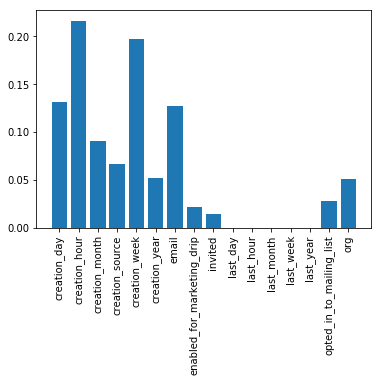

In [196]:
plt.bar(X.columns,rfc.feature_importances_)
plt.xticks(rotation=90)

In [197]:
lr.fit(Xtrain,ytrain)
lr.score(Xtest,ytest)

0.551875

In [199]:
lr.fit(Xstrain,ystrain)
lr.score(Xstest,ystest)

0.56645833333333329

In [198]:
Xs = ss.fit_transform(X)
Xstrain, Xstest, ystrain, ystest = tts(Xs,y,test_size=.4)

In [200]:
params = {'penalty':['l1','l2'],'C':[.0000001,.01,.1,1,10,100],'class_weight':['balanced']}
grid = GridSearchCV(lr,params,n_jobs=-1,cv=3,scoring='roc_auc')

In [201]:
grid.fit(Xstrain,ystrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1e-07, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [202]:
grid.cv_results_

{'mean_fit_time': array([ 0.00699997,  0.01333332,  0.00999999,  0.02199999,  0.03533332,
         0.02466663,  0.07466674,  0.0236667 ,  0.09366671,  0.02066668,
         0.06533337,  0.01933336]),
 'mean_score_time': array([ 0.02266669,  0.00933321,  0.00199993,  0.00466665,  0.00433334,
         0.00333333,  0.00566657,  0.00699997,  0.00233332,  0.0013334 ,
         0.00166663,  0.0016667 ]),
 'mean_test_score': array([ 0.5       ,  0.57622893,  0.58496324,  0.5927966 ,  0.5927907 ,
         0.59368627,  0.59368575,  0.59366369,  0.59366318,  0.59367754,
         0.59368165,  0.59368011]),
 'mean_train_score': array([ 0.5       ,  0.58201005,  0.59526596,  0.6003577 ,  0.60076002,
         0.6011581 ,  0.60119869,  0.60117785,  0.60116926,  0.60117118,
         0.60117375,  0.60117452]),
 'param_C': masked_array(data = [1e-07 1e-07 0.01 0.01 0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False False False False False],
        fill_value

In [203]:
#something is seriously wrong here.  Identical CV results must means something bad just happened
#also the logit method has an almost identical accuracy to the decision tree
pd.Series(grid.best_estimator_.predict(Xstest)).value_counts()

0    2639
1    2161
dtype: int64

In [204]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

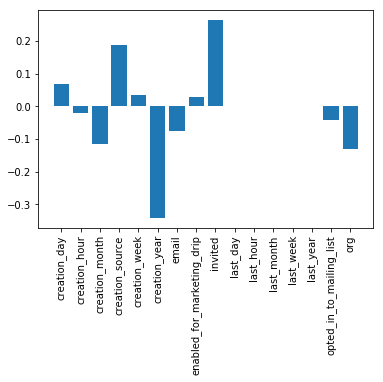

In [252]:
importes = (grid.best_estimator_.coef_)
plt.bar(X.columns,importes[0])
plt.xticks(rotation=90)

In [206]:
#look at top orgs of users. probably correlation between retention and membership in top org
#also look at email provider, maybe yahoo/hotmail/gmail is better or not do to invitation format

([<matplotlib.axis.XTick at 0x33bc87f0>],
 <a list of 1 Text xticklabel objects>)

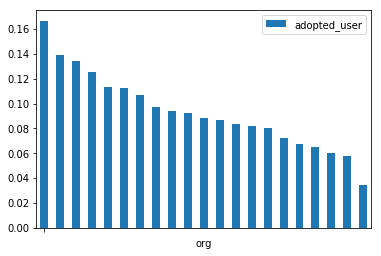

In [243]:
dh.loc[:,'adopted_user'] = dh.loc[:,'adopted_user'].astype('int')
rel = dh[['org','adopted_user']].groupby('org').mean().sort_values('adopted_user',ascending=False)
rel.plot(kind='bar')
plt.xticks(range(0,1),('',''))

(array([  41.,  126.,  135.,   66.,   20.,   21.,    5.,    2.,    0.,    1.]),
 array([ 0.        ,  0.05833333,  0.11666667,  0.175     ,  0.23333333,
         0.29166667,  0.35      ,  0.40833333,  0.46666667,  0.525     ,
         0.58333333]),
 <a list of 10 Patch objects>)

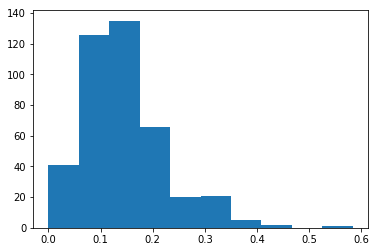

In [208]:
plt.hist(rel.adopted_user)
#It seems most organizations have a 

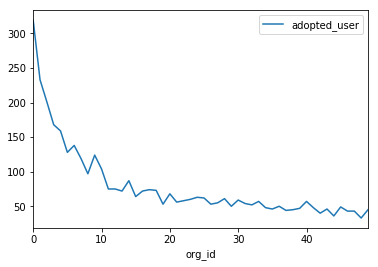

In [209]:
dh[['org_id','adopted_user']].groupby('org_id').count().head(50).plot()

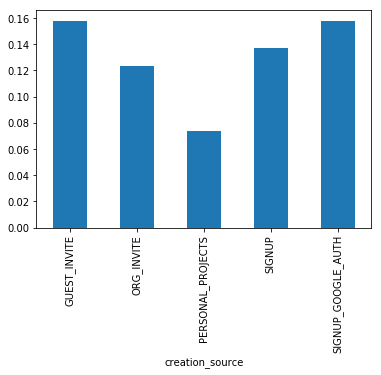

In [217]:
dh.groupby('creation_source').mean().adopted_user.plot(kind='bar')

Text(0,0.5,u'Proportion of Adopted Users')

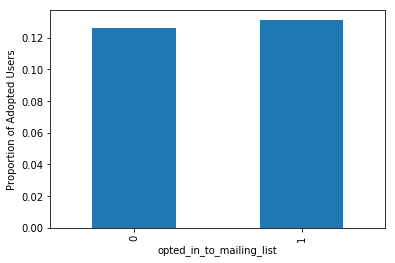

In [235]:
dh.groupby('opted_in_to_mailing_list').mean().adopted_user.plot(kind='bar')
plt.ylabel('Proportion of Adopted Users')

Text(0,0.5,u'Proportion of Adopted Users')

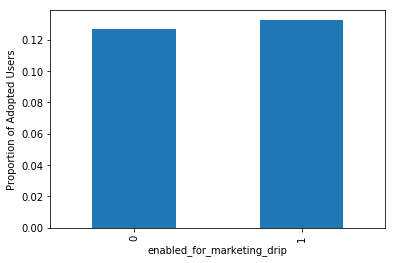

In [236]:
dh.groupby('enabled_for_marketing_drip').mean().adopted_user.plot(kind='bar')
plt.ylabel('Proportion of Adopted Users')

Text(0,0.5,u'Proportion of Adopted Users')

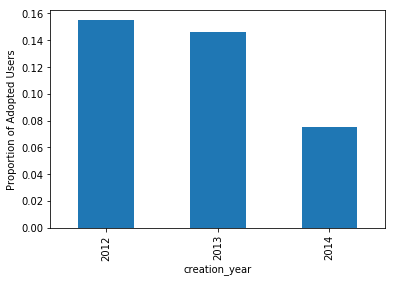

In [245]:
dh.loc[:,'creation_year'] = X.creation_year
dh.groupby('creation_year').mean().adopted_user.plot(kind='bar')
plt.ylabel('Proportion of Adopted Users')